<a href="https://colab.research.google.com/github/dibyammall/Display-data-visually-for-traders/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intercept: -3578224.234818279
Coefficients: [-4.26323917e+04 -4.24500719e+04  1.18280965e+03 -8.18797708e+00
  1.16260128e+02 -3.84922131e+01  4.63425720e+01  4.05384044e+04]
Root Mean Squared Error (RMSE): 70132.42075871752
R² Score: 0.6246548578993644


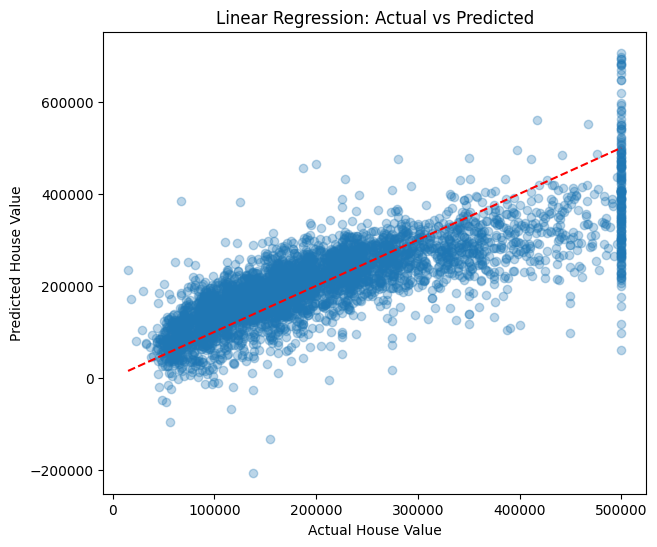

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset with correct column names
columns = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms",
    "Population", "AveOccup", "Latitude", "Longitude", "MedHouseVal"
]
df = pd.read_csv("cal_housing.data", header=None, names=columns)

# Features (X) and Target (y)
X = df.drop(columns=["MedHouseVal"])   # Capital X
y = df["MedHouseVal"]                  # Lowercase y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Plot Predicted vs Actual
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.show()
